# Explore here

In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
# load the .env file variables
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
conn = Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
artist_id = '4GvEc3ANtPPjt1ZJllr5Zl'

results = conn.artist_top_tracks(artist_id)

if results:
    tracks = results['tracks'][:10]
    top_tracks_info = [
        {
            'name': track['name'],
            'popularity': track['popularity'],
            'duration_minutes': (track['duration_ms'] / (1000 * 60)) 
        }
        for track in tracks
    ]

    df_tracks = pd.DataFrame(top_tracks_info)
    
    print(df_tracks)

                               name  popularity  duration_minutes
0                              Mine          71          2.184400
1                          Paradise          69          2.817300
2  Beautiful (feat. Camila Cabello)          70          3.000000
3                          I.F.L.Y.          69          2.761900
4                           Fantasy          67          2.470483
5                               Why          63          2.470983
6                         Beautiful          62          2.970700
7                            Myself          61          2.792533
8                              3:15          60          2.783633
9           Focus (feat. 21 Savage)          57          2.585550


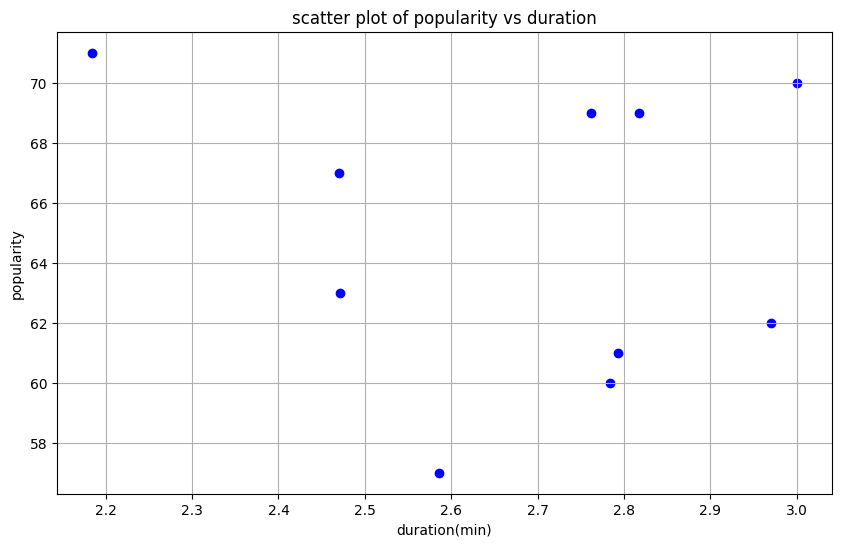

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df_tracks['duration_minutes'], df_tracks['popularity'], color='blue')

plt.title('scatter plot of popularity vs duration')
plt.xlabel('duration(min)')
plt.ylabel('popularity')
plt.grid(True)
plt.show()

### statistical relationship analysis
There doesn't seem to be a correlation between popularity and length, as the points are quite spread out. There are songs that last longer and shorter that are both popular and unpopular, meaning that length is not a determining factor for popularity in this dataset.